# Project Title:


### Fare Prediction Model for U.S. Airlines

# Problem Statement:

### Airline passengers in the United States often face challenges in selecting flights that align with their budget due to unpredictable fare fluctuations.

# Objective:

### To develop a fare prediction model that provides accurate, real-time fare forecasts, enabling travelers to make informed decisions and select flights within their desired price range.

# Solution Overview

### The fare prediction model will analyze historical fare data and use machine learning algorithms to forecast future fare trends. This tool will offer travelers insights into potential fare changes, empowering them to choose flights that best fit their budget.


# Impact:

### By providing accurate fare predictions, the model will enhance the overall booking experience, helping passengers avoid overspending and reducing the uncertainty associated with fare variations.

# import dependancies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,IsolationForest,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import warnings
warnings.simplefilter("ignore")
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR



## Read_data

In [3]:
df=pd.read_csv("US Airline Flight Routes and Fares.csv")

In [4]:
df.head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX


In [5]:
df.shape

(245955, 23)

In [6]:
df.columns

Index(['tbl', 'Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1',
       'city2', 'airportid_1', 'airportid_2', 'airport_1', 'airport_2',
       'nsmiles', 'passengers', 'fare', 'carrier_lg', 'large_ms', 'fare_lg',
       'carrier_low', 'lf_ms', 'fare_low', 'Geocoded_City1', 'Geocoded_City2',
       'tbl1apk'],
      dtype='object')

In [7]:
df.describe()

,Year,quarter,citymarketid_1,citymarketid_2,airportid_1,airportid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
count,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,244415.000000,244415.000000,244343.000000,244343.000000
mean,2008.524124,2.479153,31556.430201,32180.117086,12437.099986,13249.889525,1189.812319,299.476795,218.979587,0.665252,218.710963,0.450438,190.675939
std,8.703364,1.122149,1089.872880,1232.464184,1431.665257,1425.810159,703.143472,511.389486,82.372486,0.224635,84.674363,0.332669,73.577694
min,1993.000000,1.000000,30135.000000,30189.000000,10135.000000,10466.000000,109.000000,0.000000,50.000000,0.003800,50.000000,0.010000,50.000000
25%,2001.000000,1.000000,30721.000000,30994.000000,11193.000000,12197.000000,626.000000,21.000000,164.620000,0.480000,161.500000,0.158000,140.060000
50%,2008.000000,2.000000,31423.000000,32211.000000,12266.000000,13303.000000,1023.000000,113.000000,209.320000,0.652400,208.030000,0.360000,181.630000
75%,2016.000000,3.000000,32467.000000,33192.000000,13487.000000,14679.000000,1736.000000,339.000000,262.890000,0.871900,263.640000,0.750000,230.040000
max,2024.000000,4.000000,35412.000000,35628.000000,16440.000000,15919.000000,2724.000000,8301.000000,3377.000000,1.000000,2725.600000,1.000000,2725.600000


looking into this we can fing there is huge difference in 75 percentage and max value
nmiles,fare,passengers,fare_lg,fare_low

In [8]:
t=df[["Year","quarter","passengers"]]

In [9]:
df.shape

(245955, 23)

In [10]:
#data type of column
df.dtypes

tbl                object
Year                int64
quarter             int64
citymarketid_1      int64
citymarketid_2      int64
city1              object
city2              object
airportid_1         int64
airportid_2         int64
airport_1          object
airport_2          object
nsmiles             int64
passengers          int64
fare              float64
carrier_lg         object
large_ms          float64
fare_lg           float64
carrier_low        object
lf_ms             float64
fare_low          float64
Geocoded_City1     object
Geocoded_City2     object
tbl1apk            object
dtype: object

In [11]:
#checking the number unique value.....

df.nunique()

tbl                    2
Year                  31
quarter                4
citymarketid_1       141
citymarketid_2       128
city1                141
city2                128
airportid_1          188
airportid_2          173
airport_1            187
airport_2            173
nsmiles             1155
passengers          3883
fare               36323
carrier_lg            67
large_ms            7367
fare_lg            37508
carrier_low           71
lf_ms               9687
fare_low           32283
Geocoded_City1       238
Geocoded_City2       207
tbl1apk           245955
dtype: int64

inferance

number unique values--
unique roots --245955. means that equal to numbers rows..that much unique values



In [12]:
# Checking Data types


Changing object into category for memory save and machine learning performance

In [13]:


df[["city1","city2","airport_1","airport_2"]]=df[["city1","city2","airport_1","airport_2"]].astype("category")
df["nsmiles"]=df["nsmiles"].astype("float")
df[["citymarketid_1","citymarketid_2",
    "airportid_1","airportid_2"
    ,"carrier_low","carrier_lg",
    "tbl1apk"]]=df[["citymarketid_1",
                                      "citymarketid_2","airportid_1",
                                      "airportid_2","carrier_low",
                                      "carrier_lg","tbl1apk"]].astype("category")


In [14]:
df.dtypes

tbl                 object
Year                 int64
quarter              int64
citymarketid_1    category
citymarketid_2    category
city1             category
city2             category
airportid_1       category
airportid_2       category
airport_1         category
airport_2         category
nsmiles            float64
passengers           int64
fare               float64
carrier_lg        category
large_ms           float64
fare_lg            float64
carrier_low       category
lf_ms              float64
fare_low           float64
Geocoded_City1      object
Geocoded_City2      object
tbl1apk           category
dtype: object

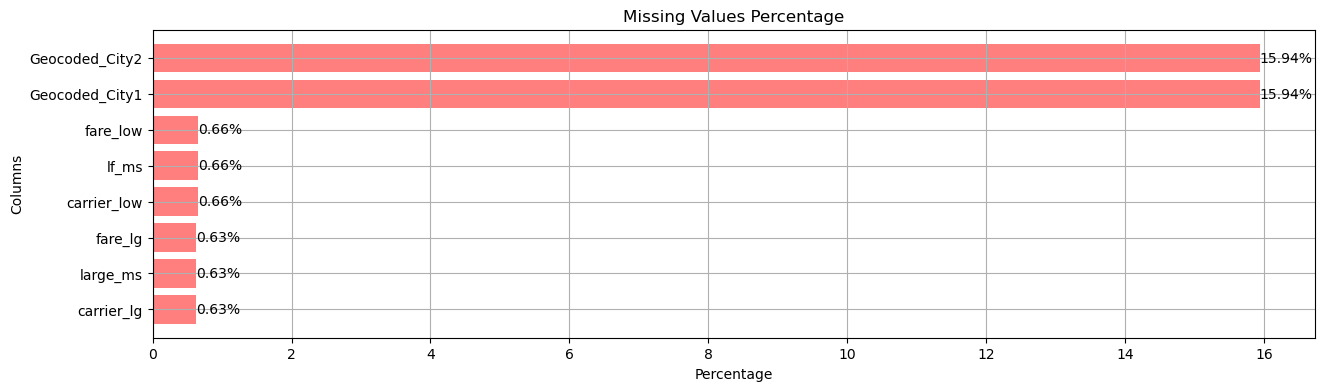

In [15]:


#checking if there is any null values.


missing=df.isnull().sum()
missing
missing_percentage=missing[missing > 0]/df.shape[0]*100
missing_percentage

plt.figure(figsize=(15, 4))
plt.barh(missing_percentage.index, missing_percentage, color='#FF7F7F')
for index, value in enumerate(missing_percentage):
    plt.text(value, index, f"{value:.2f}%", va='center', ha='left', color='black')

plt.title("Missing Values Percentage")
plt.xlabel("Percentage")
plt.ylabel("Columns")
plt.grid(True)
plt.show()


In [16]:
#the coloumns has are Geocoded_City1 and   Geocoded_City2 not important for prediction
df=df.drop(["Geocoded_City1","Geocoded_City2","tbl"],axis=1)

In [17]:
#fillling null values

df["carrier_lg"]=df["carrier_lg"].fillna(df["carrier_lg"].mode())
df["large_ms"]=df["large_ms"].fillna(df["large_ms"].mean())
df["fare_lg"]=df["fare_lg"].fillna(df["fare_lg"].mean())
df["carrier_low"]=df["carrier_low"].fillna("WN")
df["lf_ms"]=df["lf_ms"].fillna(df["lf_ms"].mean())
df["fare_low"]=df["fare_low"].fillna(df["fare_low"].mean())
df["carrier_lg"]=df["carrier_lg"].fillna("WN")


In [18]:
# renaming the last column

df=df.rename(columns={"tbl1apk":"Unique identifier for the route"})

In [19]:
df.isnull().sum()

Year                               0
quarter                            0
citymarketid_1                     0
citymarketid_2                     0
city1                              0
city2                              0
airportid_1                        0
airportid_2                        0
airport_1                          0
airport_2                          0
nsmiles                            0
passengers                         0
fare                               0
carrier_lg                         0
large_ms                           0
fare_lg                            0
carrier_low                        0
lf_ms                              0
fare_low                           0
Unique identifier for the route    0
dtype: int64

In [20]:
df.columns

Index(['Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1', 'city2',
       'airportid_1', 'airportid_2', 'airport_1', 'airport_2', 'nsmiles',
       'passengers', 'fare', 'carrier_lg', 'large_ms', 'fare_lg',
       'carrier_low', 'lf_ms', 'fare_low', 'Unique identifier for the route'],
      dtype='object')

In [21]:

df=df[df["passengers"]>0]

#### found certain outliers that is flight never go with zero passengers

### box plot

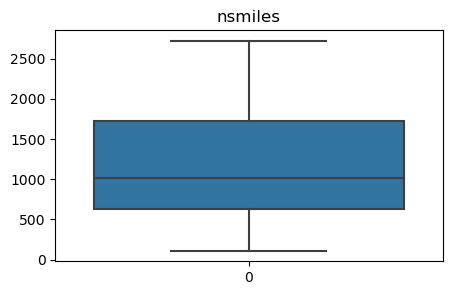

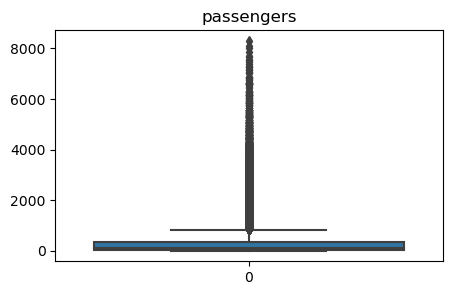

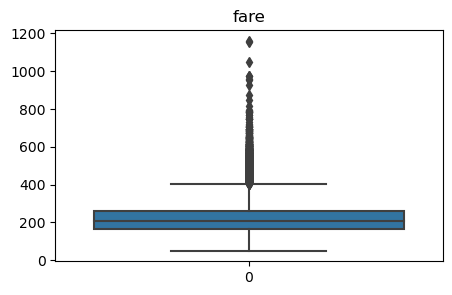

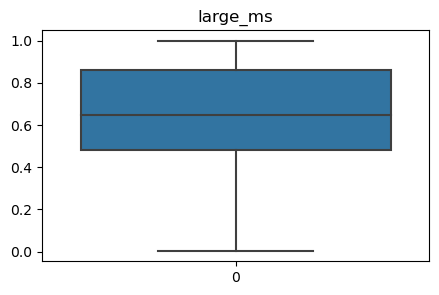

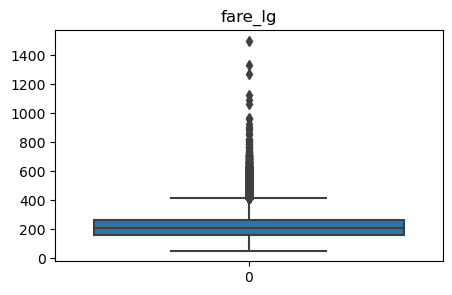

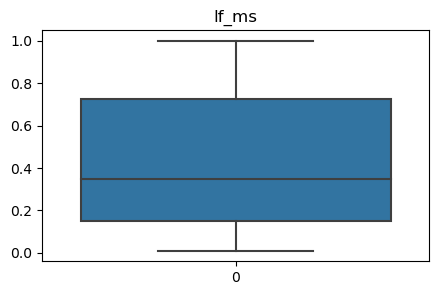

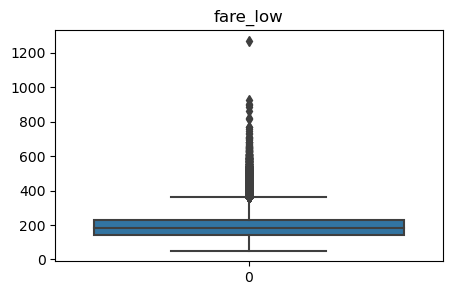

In [22]:



for col in df[[ 'nsmiles', 'passengers', 'fare', 'large_ms', 'fare_lg',
            'lf_ms', 'fare_low']]:
    plt.figure(figsize=(5,3))#To create a new figure for each boxplot
    sns.boxplot(df[col])
    plt.title(col)  # Optionally, add a title to each plot
    plt.show()  # To display each boxplot

##### inferance

found that outliers presented in fare_low,fare_lg,fare,passengers

### Outlier removing

In [23]:
#outlier removed..


for col in [ 'nsmiles', 'passengers', 'fare', 'large_ms', 'fare_lg',
            'lf_ms', 'fare_low']:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_whisker=q1-1.5*iqr
    upper_whisker=q3+1.5*iqr
    print(col)
    print(f"lower_whisker: {lower_whisker}, upper_whisker: {upper_whisker}")
    print("*"*20)
    df=df[(df[col]>lower_whisker) & (df[col]<upper_whisker)]


nsmiles
lower_whisker: -1013.5, upper_whisker: 3374.5
********************
passengers
lower_whisker: -463.0, upper_whisker: 841.0
********************
fare
lower_whisker: 26.12499999999997, upper_whisker: 406.80500000000006
********************
large_ms
lower_whisker: -0.1067625000000001, upper_whisker: 1.4579375
********************
fare_lg
lower_whisker: 19.88500000000002, upper_whisker: 405.60499999999996
********************
lf_ms
lower_whisker: -0.765, upper_whisker: 1.675
********************
fare_low
lower_whisker: 17.21499999999996, upper_whisker: 355.01500000000004
********************


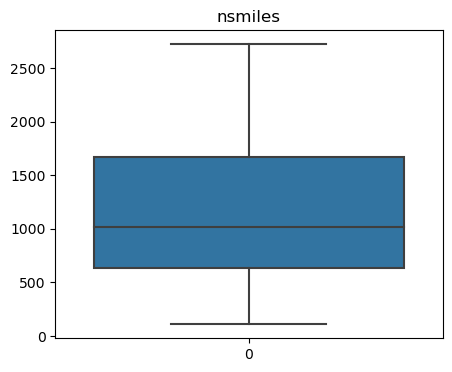

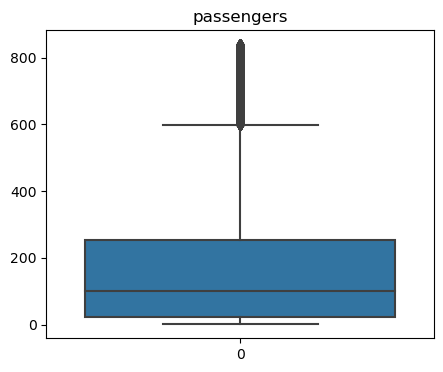

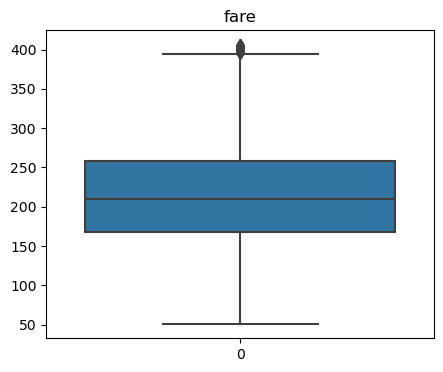

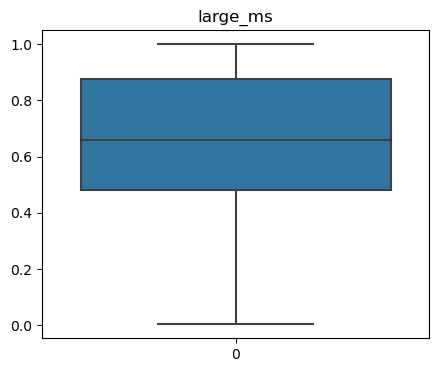

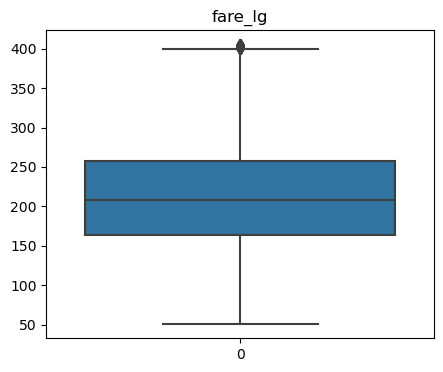

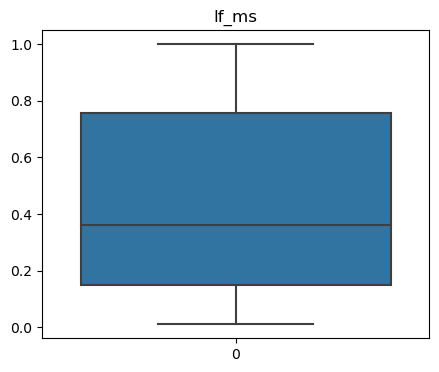

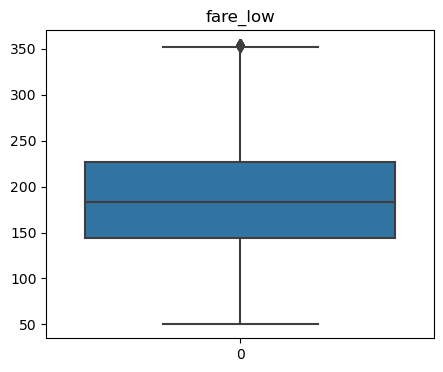

In [24]:
#removed from box plot---Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'airportid_1','airportid_2'


for col in df[[ 'nsmiles', 'passengers', 'fare', 'large_ms', 'fare_lg',
            'lf_ms', 'fare_low']]:
    plt.figure(figsize=(5,4))#To create a new figure for each boxplot
    sns.boxplot(df[col])
    plt.title(col)  # Optionally, add a title to each plot
    plt.show()  # To display each boxplot

In [25]:
#describtion

df.describe()

,Year,quarter,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
count,208195.000000,208195.000000,208195.00000,208195.000000,208195.000000,208195.000000,208195.000000,208195.000000,208195.000000
mean,2008.433742,2.483431,1176.09761,174.044857,213.679059,0.666008,212.565826,0.449654,187.233662
std,8.673726,1.123005,690.66421,196.596039,64.681886,0.225023,68.032884,0.333076,59.305560
min,1993.000000,1.000000,109.00000,1.000000,50.410000,0.003800,50.410000,0.010000,50.100000
25%,2001.000000,1.000000,632.00000,23.000000,167.390000,0.480000,163.730000,0.150000,143.570000
50%,2008.000000,2.000000,1013.00000,100.000000,209.750000,0.660000,207.920000,0.362100,183.180000
75%,2016.000000,3.000000,1671.00000,253.000000,258.360000,0.876100,257.995000,0.758600,227.090000
max,2024.000000,4.000000,2724.00000,840.000000,406.730000,1.000000,405.600000,1.000000,355.010000


In [26]:
#describtion

df.describe(include=["category"])

,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,airport_2,carrier_lg,carrier_low,Unique identifier for the route
count,208195,208195,208195,208195,208195,208195,208195,208195,208195,208195,208195
unique,141,128,141,128,181,163,180,163,64,67,208195
top,32575,31703,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",13232,11278,MDW,DCA,WN,WN,199311013510986ABECHI
freq,20293,30139,20293,30139,7411,8975,7411,8975,52990,49934,1


# EDA


### top_10_origin_city


classified based on the revenue generated


In [27]:
s=df.groupby("city1")["fare"].sum()
s=pd.DataFrame(s,columns=["fare"])
Origin_city_name=s.sort_values(ascending=False,by="fare").head(10)
Origin_city_name

,fare
city1,
"Los Angeles, CA (Metropolitan Area)",4673242.33
"Boston, MA (Metropolitan Area)",4337580.05
"New York City, NY (Metropolitan Area)",4217214.45
"Chicago, IL",2654842.10
"Dallas/Fort Worth, TX",2588513.74
"Houston, TX",2588018.52
"Cleveland, OH (Metropolitan Area)",1785686.81
"Miami, FL (Metropolitan Area)",1358412.87
"Charlotte, NC",731032.87


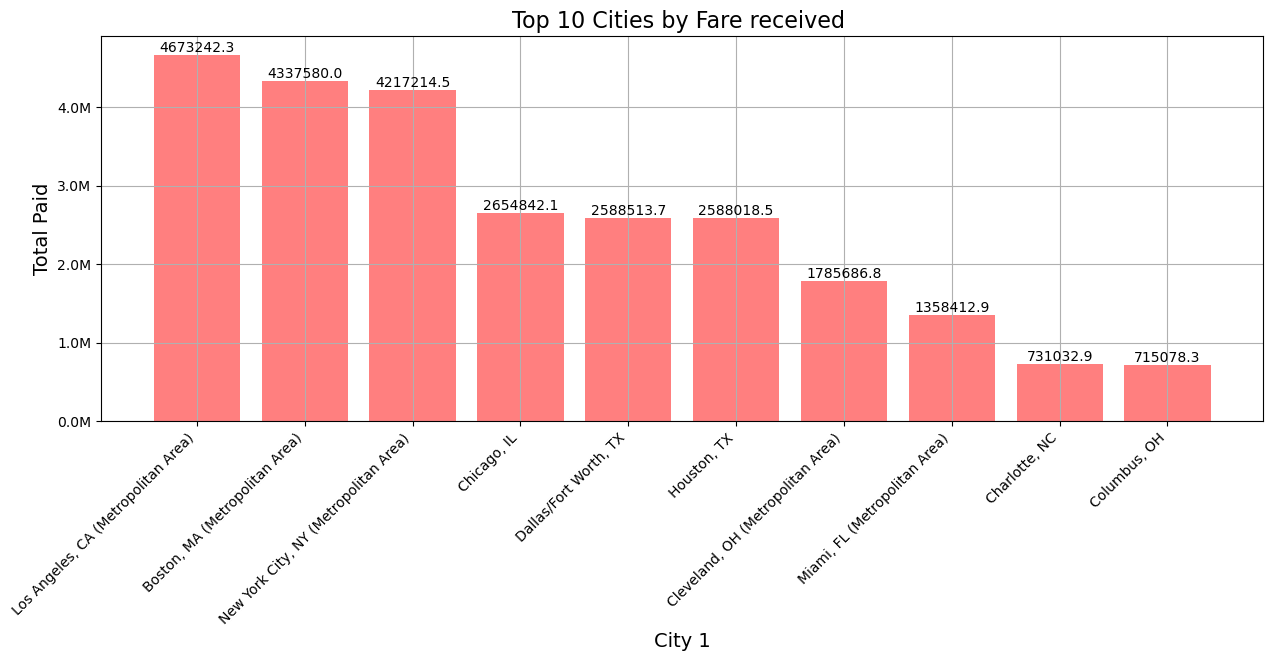

In [28]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming 'Destination_city_name' is a DataFrame
city1 = Origin_city_name.index
total_paid = Origin_city_name['fare']

# Function to format the y-axis labels
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

plt.figure(figsize=(15, 5))
bars = plt.bar(city1, total_paid, color='#FF7F7F')
plt.xticks(rotation=45, ha="right")
plt.ylabel('Total Paid', fontsize=14)
plt.xlabel('City 1', fontsize=14)
plt.grid(True)
plt.title('Top 10 Cities by Fare received ', fontsize=16)

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(formatter)

# Add the fare value on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', 
             ha='center', va='bottom', fontsize=10, color='black')

plt.show()


In [29]:
df.columns

Index(['Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1', 'city2',
       'airportid_1', 'airportid_2', 'airport_1', 'airport_2', 'nsmiles',
       'passengers', 'fare', 'carrier_lg', 'large_ms', 'fare_lg',
       'carrier_low', 'lf_ms', 'fare_low', 'Unique identifier for the route'],
      dtype='object')

In [30]:
s=df.pivot_table(index="city1",values=["passengers","fare","carrier_lg","carrier_low"]
                 ,aggfunc={"passengers":sum,"fare":sum,"carrier_lg":"count","carrier_low":"count"})
s=s.sort_values(ascending=False,by="fare").head(20)
s

,carrier_lg,carrier_low,fare,passengers
city1,,,,
"Los Angeles, CA (Metropolitan Area)",20293,20293,4673242.33,2872980
"Boston, MA (Metropolitan Area)",19818,19818,4337580.05,2940034
"New York City, NY (Metropolitan Area)",18507,18507,4217214.45,2183042
"Chicago, IL",14055,14055,2654842.10,3421495
"Dallas/Fort Worth, TX",12488,12488,2588513.74,2943431
"Houston, TX",12537,12537,2588018.52,2387134
"Cleveland, OH (Metropolitan Area)",8459,8459,1785686.81,1223377
"Miami, FL (Metropolitan Area)",6833,6833,1358412.87,1577829
"Charlotte, NC",3022,3022,731032.87,693892


###  Top_10_Destination_city_name

In [31]:
s=df.groupby("city2")["fare"].sum()
s=pd.DataFrame(s,columns=["fare"])
Destination_city_name=s.sort_values(ascending=False,by="fare").head(10)
Destination_city_name


,fare
city2,
"New York City, NY (Metropolitan Area)",6725459.01
"Washington, DC (Metropolitan Area)",5888217.03
"Los Angeles, CA (Metropolitan Area)",4330017.85
"San Francisco, CA (Metropolitan Area)",4027956.56
"Miami, FL (Metropolitan Area)",1437265.81
"Tampa, FL (Metropolitan Area)",1365156.93
"Houston, TX",1063393.63
"Norfolk, VA (Metropolitan Area)",1041388.02
"Phoenix, AZ",858034.99


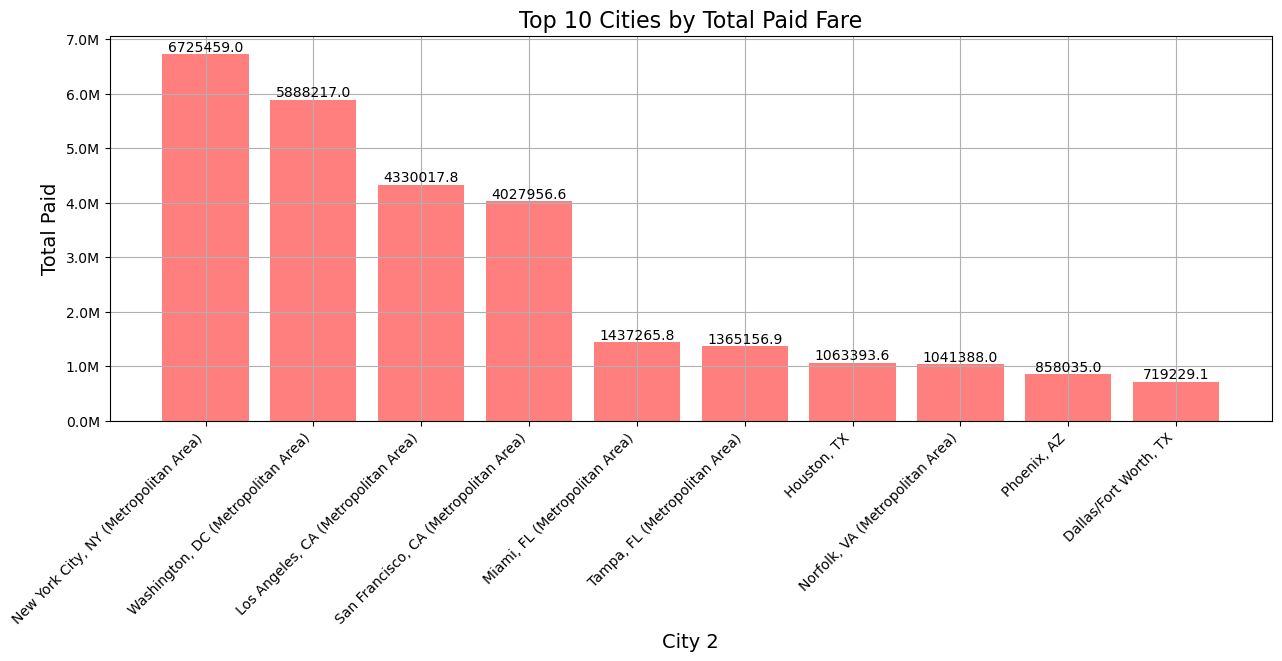

In [32]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming 'Destination_city_name' is a DataFrame
city1 = Destination_city_name.index
total_paid = Destination_city_name['fare']

# Function to format the y-axis labels
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

plt.figure(figsize=(15, 5))
bars = plt.bar(city1, total_paid, color='#FF7F7F')
plt.xticks(rotation=45, ha="right")
plt.ylabel('Total Paid', fontsize=14)
plt.xlabel('City 2', fontsize=14)
plt.grid(True)
plt.title('Top 10 Cities by Total Paid Fare', fontsize=16)

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(formatter)

# Add the fare value on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', 
             ha='center', va='bottom', fontsize=10, color='black')

plt.show()


# Revenue generated by large Carrier

In [33]:
d=df.pivot_table(index="carrier_lg",values="fare",aggfunc="sum")
f=df.pivot_table(index="carrier_lg",values="large_ms",aggfunc="sum")
f['percentage'] = (f['large_ms'] / f['large_ms'].sum()) * 100

marketshare_revenue=pd.concat([d,f],axis=1)

marketshare_revenue_l=marketshare_revenue.sort_values(ascending=False,by="fare").head(5)

marketshare_revenue_l

,fare,large_ms,percentage
carrier_lg,,,
WN,10626875.31,39042.295819,28.156963
AA,9075316.33,23949.125200,17.271900
DL,6367619.63,16714.724900,12.054514
UA,5657582.37,14298.142300,10.311696
US,4846534.94,15842.850000,11.425725


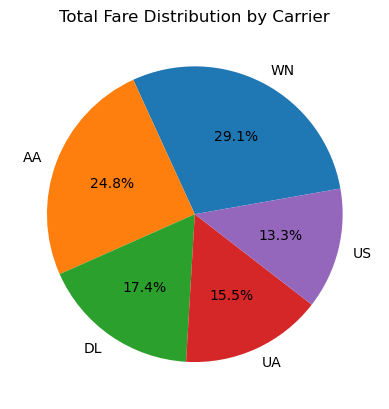

In [34]:



x = marketshare_revenue_l["fare"]

y=marketshare_revenue_l.index
plt.pie(x,labels=y, autopct='%1.1f%%', startangle=10)
plt.title("Total Fare Distribution by Carrier")
plt.show()

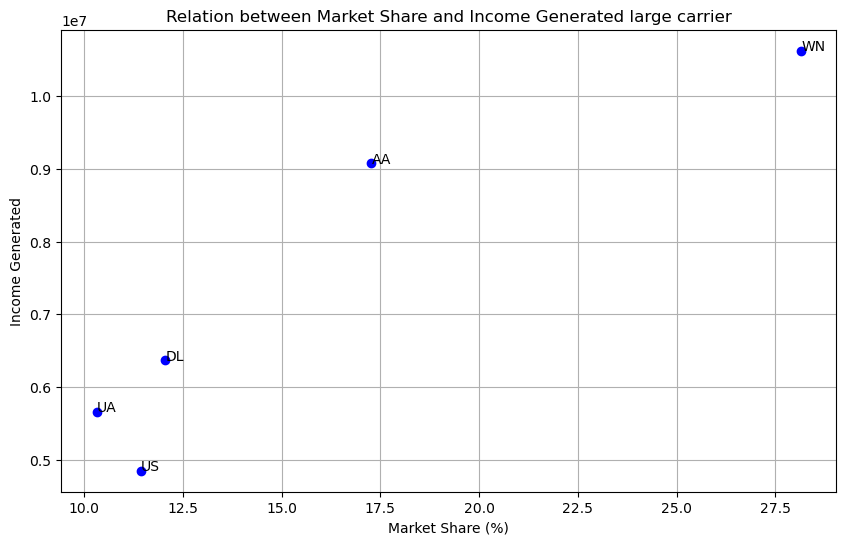

In [35]:


# Example data
places = marketshare_revenue_l.index
market_share = marketshare_revenue_l["percentage"] # Market share percentages
income_generated = marketshare_revenue_l ["fare"] # Income generated in some units

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(market_share, income_generated, color='blue')

# Annotate each point with the place name
for i, place in enumerate(places):
    plt.annotate(place, (market_share[i], income_generated[i]))

# Customize the plot
plt.title('Relation between Market Share and Income Generated large carrier')
plt.xlabel('Market Share (%)')
plt.ylabel('Income Generated')
plt.grid(True)

# Show plot
plt.show()


In [36]:
#fligh large career.......

## Revenue generated by low_carrier

In [37]:
d=df.pivot_table(index="carrier_low",values="fare",aggfunc="sum")
f=df.pivot_table(index="carrier_low",values="lf_ms",aggfunc="sum")
f['percentage'] = (f['lf_ms'] / f['lf_ms'].sum()) * 100

marketshare_revenue=pd.concat([d,f],axis=1)

marketshare_revenue_low=marketshare_revenue.sort_values(ascending=False,by="fare").head(5)
marketshare_revenue_low

,fare,lf_ms,percentage
carrier_low,,,
WN,10446045.26,30294.380994,32.360380
AA,6922433.27,13970.897100,14.923676
DL,5811357.94,9023.581100,9.638966
US,4711918.61,9938.840000,10.616643
UA,4231047.81,6789.698800,7.252739


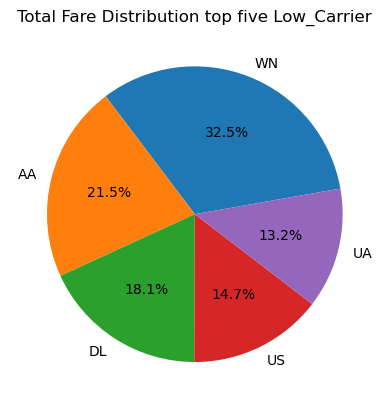

In [38]:
#pie chart
import numpy as np

# Convert to a numpy array and then to integers
x= marketshare_revenue_low["fare"]
y=marketshare_revenue_low.index

plt.pie(x,labels=y, autopct='%1.1f%%', startangle=10)
plt.title("Total Fare Distribution top five Low_Carrier")
plt.show()

# Relation between total revenue generated and market share low carrier

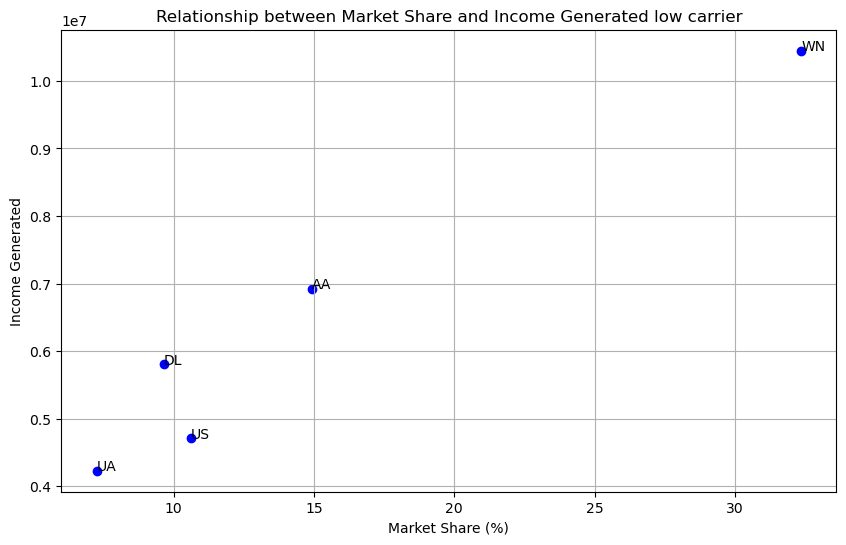

In [39]:


# Example data
places = marketshare_revenue_low.index
market_share = marketshare_revenue_low["percentage"] # Market share percentages
income_generated = marketshare_revenue_low ["fare"] # Income generated in some units

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(market_share, income_generated, color='blue')

# Annotate each point with the place name
for i, place in enumerate(places):
    plt.annotate(place, (market_share[i], income_generated[i]))

# Customize the plot
plt.title('Relationship between Market Share and Income Generated low carrier')
plt.xlabel('Market Share (%)')
plt.ylabel('Income Generated')
plt.grid(True)


# Show plot
plt.show()


## passengers travel  on yearly

In [40]:
passenger_year=df.pivot_table(index="Year",columns="quarter",values="passengers",aggfunc="count",fill_value=0)
passenger_year["Total_person_traveld"]=passenger_year.sum(axis=1)
year_passenger=passenger_year
year_passenger



quarter,1,2,3,4,Total_person_traveld
Year,,,,,
1993,2104,2242,2260,2193,8799
1994,2140,0,0,0,2140
1996,1905,1962,1903,1867,7637
1997,1860,1852,1902,1806,7420
1998,1704,1774,1879,1873,7230
1999,1773,1769,1826,1772,7140
2000,1679,1747,1793,1764,6983
2001,1689,1805,1874,1830,7198
2002,1826,1852,1898,1879,7455


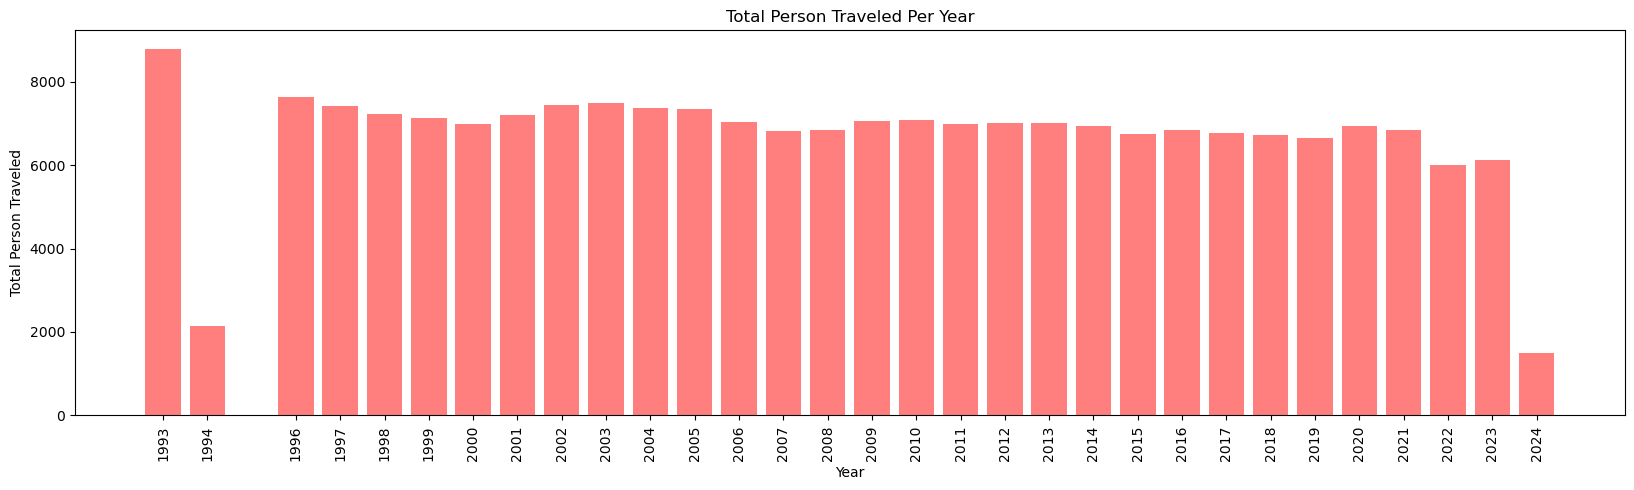

In [41]:
# Get the year and total number of people who traveled
year = year_passenger.index
total_person_traveled = year_passenger["Total_person_traveld"]

# Plot the data if the lengths match
if len(year) == len(total_person_traveled):
    plt.figure(figsize=(20, 5))
    plt.bar(year, total_person_traveled, color="#FF7F7F")
    plt.xticks(year, rotation=90)  # Rotate the year labels to make them readable
    plt.xlabel('Year')
    plt.ylabel('Total Person Traveled')
    plt.title('Total Person Traveled Per Year')
    plt.show()
else:
    print("The number of years and the total number of travelers don't match.")


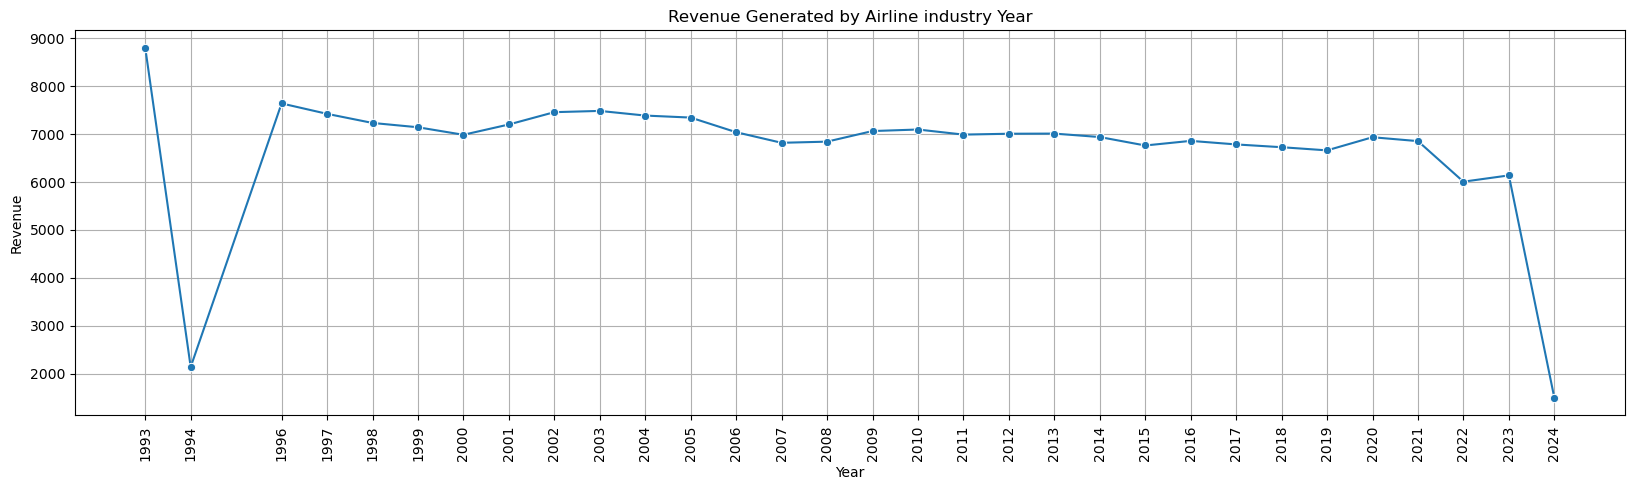

In [42]:


# Plotting total revenue generated for every year using Seaborn
plt.figure(figsize=(20, 5))
sns.lineplot(x=year_passenger.index, y=year_passenger["Total_person_traveld"] , marker='o')

# Ensure every year is included on the x-axis
plt.xticks(year_passenger.index,rotation=90)  # Rotate the year labels to make them readable
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Revenue Generated by Airline industry Year')
plt.grid(True)  # Optional: Add grid lines for better readability
plt.show()


##### inferance

In 1993, a total of 8,799 people traveled, indicating a significant volume of movement during that year

## Revenue Generated by Airline industry Year

In [43]:
pivot_table = df.pivot_table(index="Year", columns="quarter", values="fare", aggfunc=sum,fill_value=0)
pivot_table["total_revenue_generated"]=pivot_table.sum(axis=1)
r=pd.DataFrame(pivot_table)
r=r.sort_values(ascending=False,by="total_revenue_generated")

r

quarter,1,2,3,4,total_revenue_generated
Year,,,,,
1993,477130.91,461613.06,446976.90,456665.45,1842386.32
2014,413058.22,437873.08,441691.88,422512.46,1715135.64
2013,408672.08,423311.16,432858.38,421194.64,1686036.26
2012,406307.84,422781.97,413910.56,413352.52,1656352.89
2015,403721.07,422197.10,422289.78,403073.97,1651281.92
2016,396148.61,409558.97,427055.33,415009.91,1647772.82
2017,399643.82,410180.75,410337.35,402899.84,1623061.76
2018,390788.99,402411.27,408928.68,406666.17,1608795.11
2011,388223.17,407022.59,400155.02,410175.67,1605576.45


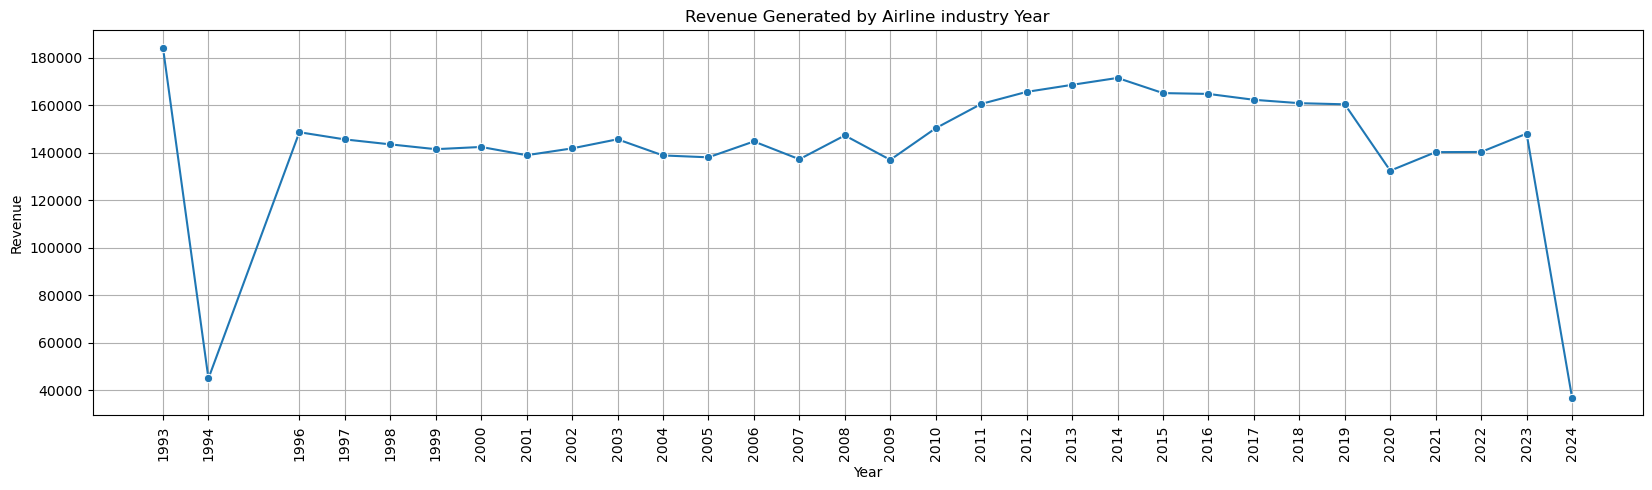

In [44]:


# Plotting total revenue generated for every year using Seaborn
plt.figure(figsize=(20, 5))
sns.lineplot(x=r.index, y=r["total_revenue_generated"] / 10, marker='o')

# Ensure every year is included on the x-axis
plt.xticks(r.index,rotation=90)  # Rotate the year labels to make them readable
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Revenue Generated by Airline industry Year')
plt.grid(True)  # Optional: Add grid lines for better readability
plt.show()


## Encoding

In [54]:
x=df.drop(["fare","airportid_1", "airportid_2","citymarketid_1", "citymarketid_2"],axis=1)
y=df[["fare"]]

In [55]:
x.columns

Index(['Year', 'quarter', 'city1', 'city2', 'airport_1', 'airport_2',
       'nsmiles', 'passengers', 'carrier_lg', 'large_ms', 'fare_lg',
       'carrier_low', 'lf_ms', 'fare_low', 'Unique identifier for the route'],
      dtype='object')

In [56]:
le=LabelEncoder()
x["Unique identifier for the route"]=le.fit_transform(x["Unique identifier for the route"])

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA

transformer = ColumnTransformer(
    transformers=[
        ("one", OneHotEncoder(sparse_output=False, drop="first"), ['city1', 'city2', 'airport_1', 'airport_2']),
        ("num", StandardScaler(), ['Year', 'quarter', 'nsmiles', 'passengers', 'large_ms', 'fare_lg', 'lf_ms', 'fare_low']),
    ]
)


In [58]:
# Fit and transform the data using ColumnTransformer
x_transformed= transformer.fit_transform(x)

# Get the feature names after transformation
feature_names = transformer.get_feature_names_out()

# Create a DataFrame with the transformed data and the feature names
x_transformed = pd.DataFrame(x_transformed, columns=feature_names)


In [59]:

x_transformed.head(4)

,"one__city1_Albuquerque, NM","one__city1_Allentown/Bethlehem/Easton, PA","one__city1_Amarillo, TX","one__city1_Appleton, WI","one__city1_Asheville, NC","one__city1_Ashland, WV","one__city1_Aspen, CO","one__city1_Atlanta, GA (Metropolitan Area)","one__city1_Atlantic City, NJ","one__city1_Augusta, GA",...,one__airport_2_WAS,one__airport_2_XNA,num__Year,num__quarter,num__nsmiles,num__passengers,num__large_ms,num__fare_lg,num__lf_ms,num__fare_low
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.448776,0.459989,-0.298406,0.030291,1.484260,-1.927541,1.652320,-1.784047
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.448776,0.459989,-0.298406,-0.788649,-0.889277,0.108980,-0.991830,-0.558527
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.448776,0.459989,-0.863081,0.152369,1.470039,-0.413416,1.642712,-0.047106
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.448776,0.459989,-0.863081,0.457564,1.383825,-0.433260,1.584467,-0.069870


In [60]:
x_train,x_test,y_train,y_test=train_test_split(x_transformed,y,test_size=.2,random_state=42)

## Linear Regression

In [51]:
model_linear=LinearRegression()

In [52]:
model_linear.fit(x_train,y_train)

LinearRegression()

In [53]:
model_linear.score(x_train,y_train)

0.9414147280415188

In [54]:
model_linear.score(x_test,y_test)

0.9426780149597539

## Gradint Boosting

In [55]:
model_gradient=GradientBoostingRegressor()

In [56]:
model_gradient.fit(x_train,y_train)

GradientBoostingRegressor()

In [57]:
model_gradient.score(x_train,y_train)

0.9564661233559326

In [58]:
model_gradient.score(x_test,y_test)

0.9568814186078416

# XGBoost

In [59]:
xgb=XGBRegressor()

In [60]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [61]:
xgb.score(x_train,y_train)

0.9760834262568714

In [62]:
xgb.score(x_test,y_test)

0.9703018294050617

In [52]:
x.head()

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Unique identifier for the route
0,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,PIE,970.0,180,G4,1.0000,81.43,G4,1.0000,81.43,191122
1,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,TPA,970.0,19,DL,0.4659,219.98,UA,0.1193,154.11,191123
2,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,DAL,580.0,204,WN,0.9968,184.44,WN,0.9968,184.44,191127
3,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,DFW,580.0,264,AA,0.9774,183.09,AA,0.9774,183.09,191129
4,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,PHX,328.0,398,WN,0.6061,184.49,AA,0.3939,165.77,191145


In [ ]:
c1_le=LabelEncoder()
city1=c1_le.fit_transform(city)

city=input('entr cty name')
city=c1_le.transform(city)

red=[year,city[0],]
pred=model.predict([red])
tr_le.inverse_transform(pred)


# Decision Tree

In [ ]:
descion_tree=DecisionTreeRegressor()

In [ ]:
descion_tree.fit(x_train,y_train)

In [ ]:
descion_tree.score(x_train,y_train)

In [ ]:
descion_tree.score(x_test,y_test)

# Random Forest

In [157]:
forest=RandomForestRegressor()

In [ ]:
forest.fit(x_train,y_train)

In [ ]:
forest.score(x_train,y_train)

In [ ]:
forest.score(x_test,y_test)

# Findings

# 

### Top City by Origin Fare Received: Los Angeles, CA (Metropolitan)


### Top City by Destination: New York City, NY (Metropolitan)


### Top Revenue-Generating Large Carrier Airline: Southwest Airlines, with a market share of 76% and revenue generated above ₹1 crore.


### Top Revenue-Generating Low-Cost Carrier Airline: Southwest Airlines, with a market share of 60% and revenue generated above ₹1 crore.


### The highest revenue was generated in 1993, amounting to $1,842,386.32.

### Year with the Most Passengers Traveled: 1993 is 8799

### The Xtream Gradient Boost model achieved 97% accuracy in predicting fares, enabling cost-effective booking for customers and providing valuable insights into competitor fare structures within the airline industry.